# Dependencies

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

# Load Data

In [45]:
train_data = pd.read_csv('/kaggle/input/just-ai-249-machine-learning-lab-competition/spambase_train.csv')
X = train_data.drop(['spam', 'ID'], axis=1)
y = train_data['spam']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.19, random_state=44)


# Plot Spam & Count

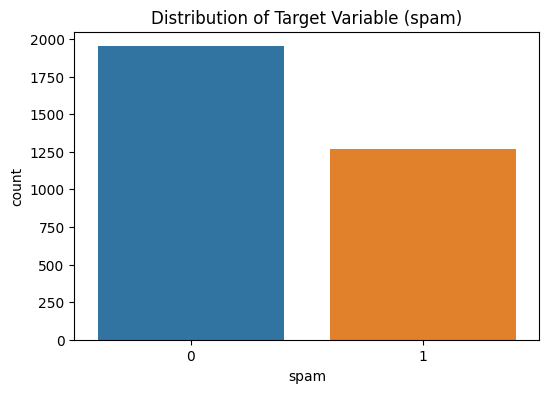

In [46]:
plt.figure(figsize=(6,4))
sns.countplot(x=train_data['spam'])
plt.title('Distribution of Target Variable (spam)')
plt.show()

#  GridSearchCV

In [47]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}


# Model Training

In [48]:
# Initialize the XGBoost model
xgb_model = XGBClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Train the model with best parameters
xgb_model = XGBClassifier(**best_params, random_state=42)
xgb_model.fit(X_train, y_train)


Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

# Predict on the validation set

In [49]:
y_pred = xgb_model.predict(X_val)
f1 = f1_score(y_val, y_pred)
print("F1 Score on Validation Set with Best Params:", f1)

# Predict on the validation set
y_pred = xgb_model.predict(X_val)

# Print the classification report
print("\n Classification Report on Validation Set:")
print(classification_report(y_val, y_pred))




F1 Score on Validation Set with Best Params: 0.9343629343629344

 Classification Report on Validation Set:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       350
           1       0.95      0.92      0.93       262

    accuracy                           0.94       612
   macro avg       0.94      0.94      0.94       612
weighted avg       0.94      0.94      0.94       612



# Confusion Matrix 

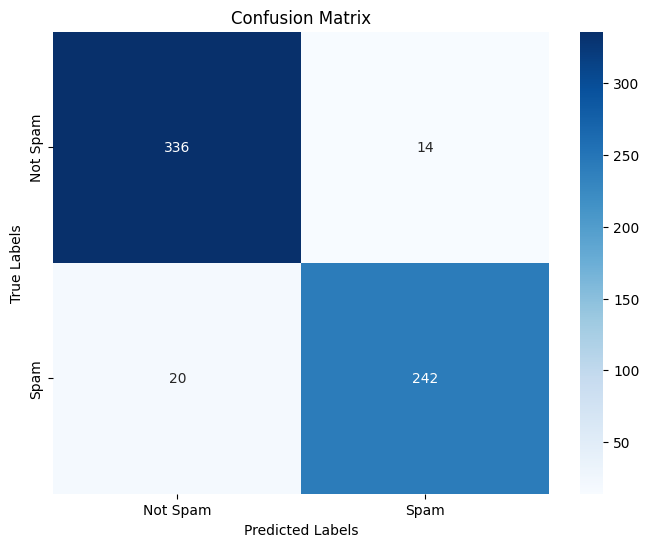

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict on the validation set
y_pred = xgb_model.predict(X_val)

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# Load the test data

In [54]:
test_data = pd.read_csv('/kaggle/input/just-ai-249-machine-learning-lab-competition/spambase_test.csv')
test_ids = test_data['ID']
X_test = test_data.drop(['ID'], axis=1)
X_test_scaled = scaler.transform(X_test)

# Predict on the test data
test_predictions = xgb_model.predict(X_test_scaled)

# Create a submission DataFrame
submission_df = pd.DataFrame({'ID': test_ids, 'spam': test_predictions})
submission_df.to_csv('XGBoost_GridSearch.csv', index=False)